In [4]:
from process_bigraph import Process, Composite, Step
import bio_bundles
import numpy as np

Cannot register OutputGenerator. Error:
**
No module named 'bio_bundles.steps.main'
**
Cannot register TimeCourseOutputGenerator. Error:
**
No module named 'bio_bundles.steps.main'
**
Cannot register SmoldynStep. Error:
**
No module named 'bio_bundles.steps.main'
**
Cannot register SimulariumSmoldynStep. Error:
**
No module named 'bio_bundles.steps.main'
**
Cannot register MongoDatabaseEmitter. Error:
**
No module named 'bio_bundles.steps.main'
**
Cannot register CopasiStep. Error:
**
No module named 'amici'
**
Cannot register TelluriumStep. Error:
**
No module named 'amici'
**
Cannot register AmiciStep. Error:
**
No module named 'amici'
**
Cannot register UtcComparator. Error:
**
No module named 'biosimulators_processes'
**
Cannot register SmoldynStep. Error:
**
No module named 'biosimulators_processes'
**
Cannot register SimulariumSmoldynStep. Error:
**
No module named 'biosimulators_processes'
**
Cannot register MongoDatabaseEmitter. Error:
**
No module named 'biosimulators_processe

In [5]:
dir(bio_bundles)

['AbstractSet',
 'Annotated',
 'Any',
 'AnyStr',
 'AsyncContextManager',
 'AsyncGenerator',
 'AsyncIterable',
 'AsyncIterator',
 'Awaitable',
 'BinaryIO',
 'ByteString',
 'Callable',
 'ChainMap',
 'ClassVar',
 'Collection',
 'Concatenate',
 'Container',
 'ContextManager',
 'Coroutine',
 'Counter',
 'DefaultDict',
 'Deque',
 'Dict',
 'Final',
 'ForwardRef',
 'FrozenSet',
 'Generator',
 'Generic',
 'Hashable',
 'IO',
 'ItemsView',
 'Iterable',
 'Iterator',
 'KeysView',
 'List',
 'Literal',
 'MODEL_TYPE',
 'Mapping',
 'MappingView',
 'Match',
 'MutableMapping',
 'MutableSequence',
 'MutableSet',
 'NamedTuple',
 'NewType',
 'NoReturn',
 'Optional',
 'OrderedDict',
 'PROCESS_IMPLEMENTATIONS',
 'ParamSpec',
 'ParamSpecArgs',
 'ParamSpecKwargs',
 'Pattern',
 'ProcessTypes',
 'Protocol',
 'Registrar',
 'Reversible',
 'STEP_IMPLEMENTATIONS',
 'Sequence',
 'Set',
 'Sized',
 'SupportsAbs',
 'SupportsBytes',
 'SupportsComplex',
 'SupportsFloat',
 'SupportsIndex',
 'SupportsInt',
 'SupportsRound',


In [11]:
from bio_bundles import registrar
from bio_bundles.data_model import BaseClass

from typing import *

import networkx as nx
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.optimizers import COBYLA


CORE = registrar.core


@dataclass
class Problem(BaseClass):
    pass


@dataclass
class NVariableProblem(Problem):
    n_vars: int
    inputs: Optional[Dict] = None

    def __post_init__(self):
        self.inputs = self.get_input_data()

    def get_input_data(self, *args, **kwargs):
        # TODO: perform some logic here to format Nvar problem
        return {}

    
class QAOA(Process):
    # same here (format n var prob)
    config_schema = {
        'num_nodes': 'integer',
        'max_depth': 'integer'
    }

    def __init__(self, config, core):
        # TODO: make n_vars mapped more to real
        super().__init__(config, core)

        # TODO: infer this from the given composite.json file as input.
        self.max_depth = self.config.get("max_depth", 3)
        self.N = self.config["num_nodes"]
        self.graph = nx.complete_graph(self.N)

        # define optimizer
        self.optimizer = COBYLA()

    def initial_state(self):
        # get initial problem hamiltonian from weights set in init
        initial_h_problem = self._get_problem_hamiltonian()
        
        # get mixer hamiltonian from current N(self.N)
        initial_h_mixer = self._get_mixer_hamiltonian(self.N)
        
        # get intitial ansatz
        initial_ansatz = self._get_ansatz(self.N)

        return {
            "H_P": initial_h_problem,
            "H_M": initial_h_mixer,
            "ansatz" initial_ansatz
        }
        
    def inputs(self):
        return {
            "H_P":{}}

    def outputs(self):
        return {}

    def _get_problem_hamiltonian(self):
        h = 0
        for i, j in self.graph.edges():
            weight = self.graph[i][j]['weight']
            h += weight * (0.5 * (1 - Z(i) @ Z(j)))
        return h

    def _get_mixer_hamiltonian(self, N: int):
        return sum([X(i) for i in range(N)])

    def _get_ansatz(self, N: int):
        return TwoLocal(N, 'ry', 'cz', reps=self.max_depth, entanglement='linear')
        
    def _compute_edge_weight(a, b):
        # TODO: implement this, for now returing random
        return np.random.rand()

    def check_n(self):
        pass

    

    

IndentationError: expected an indented block after function definition on line 14 (3854564678.py, line 17)

In [17]:
import networkx as nx

G = nx.complete_graph(4)
G.edges()
for u, v in G.edges():
    edge = G[u][v]
    edge['weight'] = 10


In [18]:
G

In [20]:
from qiskit.opflow import Z, I
H_P = sum([w_ij * (0.5 * (I - Z(i) @ Z(j))) for i, j in graph.edges()])


ModuleNotFoundError: No module named 'qiskit.opflow'

In [21]:
from qiskit.circuit.library import ZGate

In [29]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw as draw_graph
N = 5
graph = rx.PyGraph()
graph.add_nodes_from(np.arange(0, N, 1))

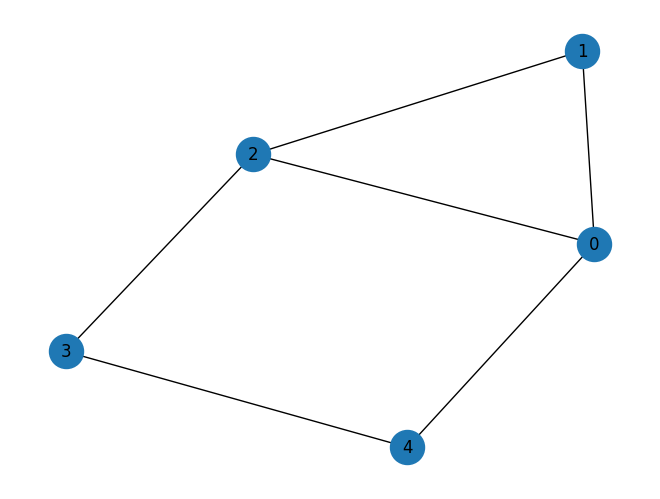

In [33]:
edge_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 0.0)]
graph.add_edges_from(edge_list)
draw_graph(graph, node_size=600, with_labels=True)